In [2]:
import pandas as pd # Data handling and managing
import numpy as np  # Handiling linear Algera
import seaborn as sn
import datetime 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import pmdarima as pm

%matplotlib inline

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy


<ipython-input-2-575ae59b867e>:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
prevision_empresa=pd.read_excel(r'C:\Users\subir\OneDrive\Escritorio\PC ANTIC\UOC\TFM\04_PrevisionesEmpresa.xlsx')

In [4]:
prevision_empresa['Fecha'] = pd.to_datetime(prevision_empresa['fecha'])

In [4]:
prevision_empresa


,Producto,fecha,udsPrevisionEmpresa,Fecha
0,1,2019-01-30,9020,2019-01-30
1,1,2019-01-31,2696,2019-01-31
2,1,2019-02-27,8605,2019-02-27
3,1,2019-02-28,12027,2019-02-28
4,1,2019-03-01,12442,2019-03-01
...,...,...,...,...
30023,99,2021-02-16,1944,2021-02-16
30024,99,2021-02-17,3499,2021-02-17
30025,99,2021-02-18,324,2021-02-18
30026,99,2021-02-19,1875,2021-02-19


In [5]:
dataset=pd.read_excel(r'C:\Users\subir\OneDrive\Escritorio\PC ANTIC\UOC\TFM\Resultado_final.xlsx')

In [6]:
test=prevision_empresa.merge(dataset, on=['Fecha','Producto'], how='left')

In [7]:
test=test.dropna()

In [8]:
test

,Producto,fecha,udsPrevisionEmpresa,Fecha,Unnamed: 0,udsVenta,flag,Precio,Festivo,Fin de semana,...,sales_lag_330,sales_lag_360,sales_roll_mean_365,sales_roll_mean_546,sales_roll_mean_730,Mes,Dia,DiaDeLaSemana,Año,prediccion
249,1,2019-12-31,10783,2019-12-31,184.0,691.0,0.0,3.910500,0.0,0.0,...,0.0,0.0,535.044701,331.188730,231.598390,12.0,31.0,1.0,2019.0,910.051575
250,1,2020-01-01,36495,2020-01-01,185.0,0.0,0.0,3.910500,1.0,0.0,...,518.0,0.0,536.871361,333.166789,232.649637,1.0,1.0,2.0,2020.0,203.423706
253,1,2020-01-04,21565,2020-01-04,186.0,346.0,0.0,3.910500,0.0,1.0,...,0.0,0.0,538.698020,335.146950,233.702512,1.0,4.0,5.0,2020.0,489.044006
254,1,2020-01-06,29589,2020-01-06,188.0,0.0,0.0,3.910500,1.0,0.0,...,0.0,0.0,542.217206,339.056112,235.808783,1.0,6.0,0.0,2020.0,348.442596
255,1,2020-01-07,5944,2020-01-07,189.0,1037.0,0.0,3.910500,0.0,0.0,...,0.0,0.0,543.961331,340.987508,236.860751,1.0,7.0,1.0,2020.0,1204.154419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,2021-02-16,1944,2021-02-16,105920.0,162.0,0.0,4.394742,0.0,0.0,...,1620.0,108.0,225.017050,217.317829,200.043862,2.0,16.0,1.0,2021.0,304.835236
30189,99,2021-02-17,3499,2021-02-17,105921.0,756.0,0.0,4.394742,0.0,0.0,...,0.0,378.0,224.180895,217.468536,200.108309,2.0,17.0,2.0,2021.0,349.352570
30190,99,2021-02-18,324,2021-02-18,105922.0,0.0,0.0,4.394742,0.0,0.0,...,108.0,0.0,223.367315,217.625401,200.173365,2.0,18.0,3.0,2021.0,173.733719
30191,99,2021-02-19,1875,2021-02-19,105923.0,0.0,0.0,4.394742,0.0,0.0,...,0.0,378.0,222.565021,217.787338,200.241055,2.0,19.0,4.0,2021.0,425.050903


In [8]:
test.to_excel(r'C:\Users\subir\OneDrive\Escritorio\PC ANTIC\UOC\TFM\Resultado_EmpresaVsEstudio.xlsx')

In [9]:
mse = mean_squared_error(test['udsPrevisionEmpresa'], test['udsVenta'])
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 23954237.19
RMSE: 4894.31


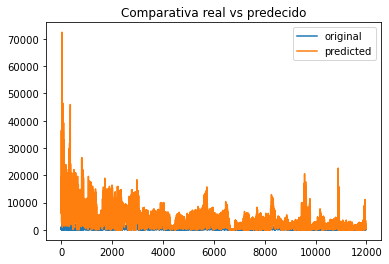

In [11]:
#Plot resultado vs real

x_ax = range(len(test['udsVenta']))
plt.plot(x_ax, test['udsVenta'], label="original")
plt.plot(x_ax, test['udsPrevisionEmpresa'], label="predicted")
plt.title("Comparativa real vs predecido")
plt.legend()
plt.show()

In [10]:
df = test[['Producto','udsPrevisionEmpresa','Fecha','udsVenta','Precio','prediccion']]

In [11]:
df['EstimUdsStockPrevisionEmpresa']=1.64*4894
df['EstimUdsStockPrevisionPrediccion']=1.64*383
df

<ipython-input-11-e6de209f3bca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimUdsStockPrevisionEmpresa']=1.64*4894
<ipython-input-11-e6de209f3bca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimUdsStockPrevisionPrediccion']=1.64*383


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026.16,628.12
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026.16,628.12
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026.16,628.12
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026.16,628.12
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026.16,628.12
...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026.16,628.12
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026.16,628.12
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026.16,628.12
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026.16,628.12


In [12]:
df['StockFinalPrevision']=df['EstimUdsStockPrevisionPrediccion']+df['prediccion']
df['StockFinalEmpresa']=df['EstimUdsStockPrevisionEmpresa']+df['udsPrevisionEmpresa']
df

<ipython-input-12-c4b19021a6fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockFinalPrevision']=df['EstimUdsStockPrevisionPrediccion']+df['prediccion']
<ipython-input-12-c4b19021a6fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockFinalEmpresa']=df['EstimUdsStockPrevisionEmpresa']+df['udsPrevisionEmpresa']


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026.16,628.12,1538.171575,18809.16
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026.16,628.12,831.543706,44521.16
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026.16,628.12,1117.164006,29591.16
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026.16,628.12,976.562596,37615.16
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026.16,628.12,1832.274419,13970.16
...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026.16,628.12,932.955236,9970.16
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026.16,628.12,977.472570,11525.16
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026.16,628.12,801.853719,8350.16
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026.16,628.12,1053.170903,9901.16


In [13]:
df['5%Precio']=0.05*df['Precio']
df

<ipython-input-13-e3b59844e9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5%Precio']=0.05*df['Precio']


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026.16,628.12,1538.171575,18809.16,0.195525
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026.16,628.12,831.543706,44521.16,0.195525
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026.16,628.12,1117.164006,29591.16,0.195525
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026.16,628.12,976.562596,37615.16,0.195525
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026.16,628.12,1832.274419,13970.16,0.195525
...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026.16,628.12,932.955236,9970.16,0.219737
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026.16,628.12,977.472570,11525.16,0.219737
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026.16,628.12,801.853719,8350.16,0.219737
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026.16,628.12,1053.170903,9901.16,0.219737


In [14]:
df['CosteStockDiarioEmpresa']=df['5%Precio']*df['StockFinalEmpresa']
df['CosteStockDiarioPrediccion']=df['5%Precio']*df['StockFinalPrevision']
df

<ipython-input-14-c35d8a7a904f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CosteStockDiarioEmpresa']=df['5%Precio']*df['StockFinalEmpresa']
<ipython-input-14-c35d8a7a904f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CosteStockDiarioPrediccion']=df['5%Precio']*df['StockFinalPrevision']


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026.16,628.12,1538.171575,18809.16,0.195525,3677.661009,300.750997
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026.16,628.12,831.543706,44521.16,0.195525,8704.999809,162.587583
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026.16,628.12,1117.164006,29591.16,0.195525,5785.811559,218.433492
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026.16,628.12,976.562596,37615.16,0.195525,7354.704159,190.942402
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026.16,628.12,1832.274419,13970.16,0.195525,2731.515534,358.255456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026.16,628.12,932.955236,9970.16,0.219737,2190.813832,205.004858
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026.16,628.12,977.472570,11525.16,0.219737,2532.504989,214.786967
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026.16,628.12,801.853719,8350.16,0.219737,1834.839764,176.196994
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026.16,628.12,1053.170903,9901.16,0.219737,2175.651973,231.420698


In [15]:
df['EstimUdsStockPrevisionEmpresa']=df['EstimUdsStockPrevisionEmpresa'].astype(int)
df['EstimUdsStockPrevisionPrediccion']=df['EstimUdsStockPrevisionPrediccion'].astype(int)

df['StockFinalPrevision']=df['StockFinalPrevision'].astype(int)
df['StockFinalEmpresa']=df['StockFinalEmpresa'].astype(int)
df

<ipython-input-15-68556a65bbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimUdsStockPrevisionEmpresa']=df['EstimUdsStockPrevisionEmpresa'].astype(int)
<ipython-input-15-68556a65bbf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimUdsStockPrevisionPrediccion']=df['EstimUdsStockPrevisionPrediccion'].astype(int)
<ipython-input-15-68556a65bbf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026,628,1538,18809,0.195525,3677.661009,300.750997
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026,628,831,44521,0.195525,8704.999809,162.587583
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026,628,1117,29591,0.195525,5785.811559,218.433492
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026,628,976,37615,0.195525,7354.704159,190.942402
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026,628,1832,13970,0.195525,2731.515534,358.255456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026,628,932,9970,0.219737,2190.813832,205.004858
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026,628,977,11525,0.219737,2532.504989,214.786967
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026,628,801,8350,0.219737,1834.839764,176.196994
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026,628,1053,9901,0.219737,2175.651973,231.420698


In [16]:
def f(row):
    if row['udsVenta'] > row['StockFinalEmpresa']:
        val = row['udsVenta']-row['StockFinalEmpresa']
    else:
        val = 0
    return val


df['UdsDemandadasNoVendidasEmpresa'] = df.apply(f, axis=1)
df

<ipython-input-16-58fa85fd3c5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UdsDemandadasNoVendidasEmpresa'] = df.apply(f, axis=1)


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion,UdsDemandadasNoVendidasEmpresa
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026,628,1538,18809,0.195525,3677.661009,300.750997,0
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026,628,831,44521,0.195525,8704.999809,162.587583,0
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026,628,1117,29591,0.195525,5785.811559,218.433492,0
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026,628,976,37615,0.195525,7354.704159,190.942402,0
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026,628,1832,13970,0.195525,2731.515534,358.255456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026,628,932,9970,0.219737,2190.813832,205.004858,0
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026,628,977,11525,0.219737,2532.504989,214.786967,0
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026,628,801,8350,0.219737,1834.839764,176.196994,0
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026,628,1053,9901,0.219737,2175.651973,231.420698,0


In [17]:
def q(row):
    if row['udsVenta'] > row['StockFinalPrevision']:
        val = row['udsVenta']-row['StockFinalPrevision']
    else:
        val = 0
    return val


df['UdsDemandadasNoVendidasPrediccion'] = df.apply(q, axis=1)
df

<ipython-input-17-962d361f997d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UdsDemandadasNoVendidasPrediccion'] = df.apply(q, axis=1)


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion,UdsDemandadasNoVendidasEmpresa,UdsDemandadasNoVendidasPrediccion
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026,628,1538,18809,0.195525,3677.661009,300.750997,0,0.0
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026,628,831,44521,0.195525,8704.999809,162.587583,0,0.0
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026,628,1117,29591,0.195525,5785.811559,218.433492,0,0.0
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026,628,976,37615,0.195525,7354.704159,190.942402,0,0.0
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026,628,1832,13970,0.195525,2731.515534,358.255456,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026,628,932,9970,0.219737,2190.813832,205.004858,0,0.0
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026,628,977,11525,0.219737,2532.504989,214.786967,0,0.0
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026,628,801,8350,0.219737,1834.839764,176.196994,0,0.0
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026,628,1053,9901,0.219737,2175.651973,231.420698,0,0.0


In [18]:
df['15%Precio']=0.15*df['Precio']

<ipython-input-18-af4930e634f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['15%Precio']=0.15*df['Precio']


In [19]:
df['CosteVentasPerdidasEmpresa']=df['15%Precio']*df['UdsDemandadasNoVendidasEmpresa']
df['CosteVentasPerdidasPrevision']=df['15%Precio']*df['UdsDemandadasNoVendidasPrediccion']
df

<ipython-input-19-ec254a950632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CosteVentasPerdidasEmpresa']=df['15%Precio']*df['UdsDemandadasNoVendidasEmpresa']
<ipython-input-19-ec254a950632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CosteVentasPerdidasPrevision']=df['15%Precio']*df['UdsDemandadasNoVendidasPrediccion']


,Producto,udsPrevisionEmpresa,Fecha,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,StockFinalEmpresa,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion,UdsDemandadasNoVendidasEmpresa,UdsDemandadasNoVendidasPrediccion,15%Precio,CosteVentasPerdidasEmpresa,CosteVentasPerdidasPrevision
249,1,10783,2019-12-31,691.0,3.910500,910.051575,8026,628,1538,18809,0.195525,3677.661009,300.750997,0,0.0,0.586575,0.0,0.0
250,1,36495,2020-01-01,0.0,3.910500,203.423706,8026,628,831,44521,0.195525,8704.999809,162.587583,0,0.0,0.586575,0.0,0.0
253,1,21565,2020-01-04,346.0,3.910500,489.044006,8026,628,1117,29591,0.195525,5785.811559,218.433492,0,0.0,0.586575,0.0,0.0
254,1,29589,2020-01-06,0.0,3.910500,348.442596,8026,628,976,37615,0.195525,7354.704159,190.942402,0,0.0,0.586575,0.0,0.0
255,1,5944,2020-01-07,1037.0,3.910500,1204.154419,8026,628,1832,13970,0.195525,2731.515534,358.255456,0,0.0,0.586575,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30188,99,1944,2021-02-16,162.0,4.394742,304.835236,8026,628,932,9970,0.219737,2190.813832,205.004858,0,0.0,0.659211,0.0,0.0
30189,99,3499,2021-02-17,756.0,4.394742,349.352570,8026,628,977,11525,0.219737,2532.504989,214.786967,0,0.0,0.659211,0.0,0.0
30190,99,324,2021-02-18,0.0,4.394742,173.733719,8026,628,801,8350,0.219737,1834.839764,176.196994,0,0.0,0.659211,0.0,0.0
30191,99,1875,2021-02-19,0.0,4.394742,425.050903,8026,628,1053,9901,0.219737,2175.651973,231.420698,0,0.0,0.659211,0.0,0.0


In [20]:
df.to_excel(r'C:\Users\subir\OneDrive\Escritorio\PC ANTIC\UOC\TFM\DatasetResultados.xlsx')

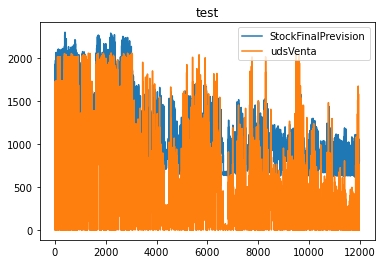

In [21]:
x_ax = range(len(df['udsVenta']))
#plt.plot(x_ax, df['StockFinalEmpresa'], label="StockFinalEmpresa")
plt.plot(x_ax, df['StockFinalPrevision'], label="StockFinalPrevision")
plt.plot(x_ax, df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

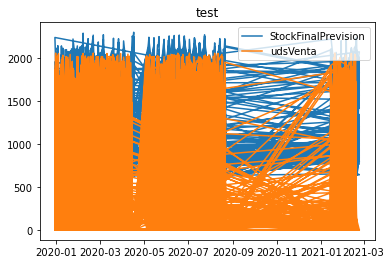

In [52]:

#plt.plot(x_ax, df['StockFinalEmpresa'], label="StockFinalEmpresa")
plt.plot( df['StockFinalPrevision'], label="StockFinalPrevision")
plt.plot( df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

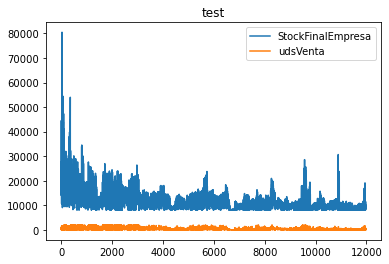

In [36]:
x_ax = range(len(df['udsVenta']))
plt.plot(x_ax, df['StockFinalEmpresa'], label="StockFinalEmpresa")
#plt.plot(x_ax, df['StockFinalPrevision'], label="StockFinalPrevision")
plt.plot(x_ax, df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

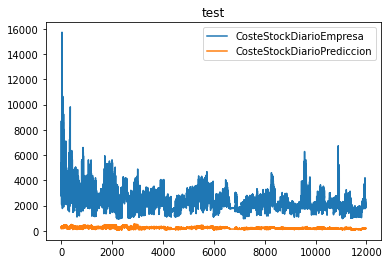

In [37]:
x_ax = range(len(df['udsVenta']))
plt.plot(x_ax, df['CosteStockDiarioEmpresa'], label="CosteStockDiarioEmpresa")
plt.plot(x_ax, df['CosteStockDiarioPrediccion'], label="CosteStockDiarioPrediccion")
#plt.plot(x_ax, df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

In [48]:
df = df.set_index('Fecha')


KeyError: "None of ['Fecha'] are in the columns"

In [49]:
df

,Producto,udsPrevisionEmpresa,udsVenta,Precio,prediccion,EstimUdsStockPrevisionEmpresa,EstimUdsStockPrevisionPrediccion,StockFinalPrevision,5%Precio,CosteStockDiarioEmpresa,CosteStockDiarioPrediccion,UdsDemandadasNoVendidasEmpresa,UdsDemandadasNoVendidasPrediccion,StockFinalEmpresa,15%Precio,CosteVentasPerdidasEmpresa,CosteVentasPerdidasPrevision
Fecha,,,,,,,,,,,,,,,,,
2019-12-31,1,10783,691.0,3.910500,910.051575,8026,628,1538,0.195525,3677.629725,300.727534,0,0.0,18809,0.586575,0.0,0.0
2020-01-01,1,36495,0.0,3.910500,203.423706,8026,628,831,0.195525,8704.968525,162.564120,0,0.0,44521,0.586575,0.0,0.0
2020-01-04,1,21565,346.0,3.910500,489.044006,8026,628,1117,0.195525,5785.780275,218.410029,0,0.0,29591,0.586575,0.0,0.0
2020-01-06,1,29589,0.0,3.910500,348.442596,8026,628,976,0.195525,7354.672875,190.918939,0,0.0,37615,0.586575,0.0,0.0
2020-01-07,1,5944,1037.0,3.910500,1204.154419,8026,628,1832,0.195525,2731.484250,358.231993,0,0.0,13970,0.586575,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16,99,1944,162.0,4.394742,304.835236,8026,628,932,0.219737,2190.778674,204.978490,0,0.0,9970,0.659211,0.0,0.0
2021-02-17,99,3499,756.0,4.394742,349.352570,8026,628,977,0.219737,2532.469831,214.760598,0,0.0,11525,0.659211,0.0,0.0
2021-02-18,99,324,0.0,4.394742,173.733719,8026,628,801,0.219737,1834.804606,176.170625,0,0.0,8350,0.659211,0.0,0.0


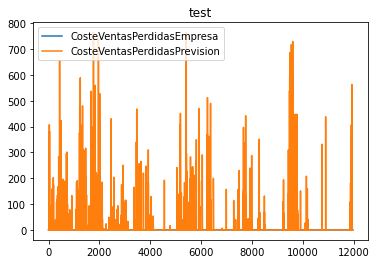

In [40]:
x_ax = range(len(df['CosteVentasPerdidasPrevision']))
plt.plot(x_ax, df['CosteVentasPerdidasEmpresa'], label="CosteVentasPerdidasEmpresa")
plt.plot(x_ax, df['CosteVentasPerdidasPrevision'], label="CosteVentasPerdidasPrevision")
#plt.plot(x_ax, df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

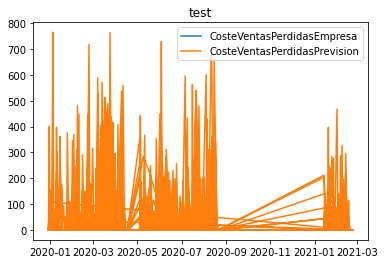

In [51]:

plt.plot(df['CosteVentasPerdidasEmpresa'], label="CosteVentasPerdidasEmpresa")
plt.plot( df['CosteVentasPerdidasPrevision'], label="CosteVentasPerdidasPrevision")
#plt.plot(x_ax, df['udsVenta'], label="udsVenta")
plt.title("test")
plt.legend()
plt.show()

In [22]:

print("CosteVentasPerdidasPrevision: ", sum(df['CosteVentasPerdidasPrevision']))
print("CosteVentasPerdidasEmpresa: ", sum(df['CosteVentasPerdidasEmpresa']))

print("CosteStockTotalEmpresa: ", sum(df['CosteStockDiarioEmpresa']))
print("CosteStockTotalPrediccion: ", sum(df['CosteStockDiarioPrediccion']))

CosteVentasPerdidasPrevision:  89060.55091796469
CosteVentasPerdidasEmpresa:  0.0
CosteStockTotalEmpresa:  28168813.665666252
CosteStockTotalPrediccion:  2816074.362615813
